<a href="https://colab.research.google.com/github/Karan1106/Assignment2/blob/master/Scraping_img_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install selenium

     |████████████████████████████████| 911kB 4.6MB/s 


In [2]:

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [4]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import optimizers
import scipy


from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

Using TensorFlow backend.


In [5]:
input_shape=(150,150,3)
img_width=150
img_height=150


nb_train_samples=2000
nb_validation_samples=1000
batch_size=32
epochs=10

train_data_dir='/content/gdrive/My Drive/Colab Notebooks/Scrap_train'
validation_data_dir='/content/gdrive/My Drive/Colab Notebooks/Scrap_test'

In [6]:

#rescaling data
datagen=ImageDataGenerator(rescale=1./255)

train_generator=datagen.flow_from_directory(
         train_data_dir,
         target_size=(img_width,img_height),
         batch_size=8,
         class_mode='categorical')

validation_generator=datagen.flow_from_directory(
         validation_data_dir,
         target_size=(img_width,img_height),
         batch_size=16,
         class_mode='categorical')

Found 307 images belonging to 3 classes.
Found 82 images belonging to 3 classes.


In [7]:
#model building
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

#flatten layer
model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [8]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)       

In [9]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#model saving
model.save('variation_dropout.h5')

In [10]:
#Data augmentation
train_datagen_augmenteted=ImageDataGenerator(
       rescale=1./255,
       shear_range=0.2,
       zoom_range=0.2,
       rotation_range=30,
       horizontal_flip=True)

In [11]:
train_datagen_augmenteted=train_datagen_augmenteted.flow_from_directory(
                train_data_dir,
                target_size=(img_width,img_height),
                batch_size=8,
               class_mode='categorical',)

Found 307 images belonging to 3 classes.


In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("variation_dropout.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')


history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[checkpoint,early])


Epoch 1/10
62/62 [==============================] - 5s 78ms/step - loss: 0.9279 - accuracy: 0.5473 - val_loss: 0.6124 - val_accuracy: 0.7207

Epoch 00001: val_accuracy improved from -inf to 0.72066, saving model to variation_dropout.h5
Epoch 2/10
62/62 [==============================] - 3s 47ms/step - loss: 0.4289 - accuracy: 0.8106 - val_loss: 0.5690 - val_accuracy: 0.7887

Epoch 00002: val_accuracy improved from 0.72066 to 0.78873, saving model to variation_dropout.h5
Epoch 3/10
62/62 [==============================] - 3s 48ms/step - loss: 0.2998 - accuracy: 0.8827 - val_loss: 0.4499 - val_accuracy: 0.7606

Epoch 00003: val_accuracy did not improve from 0.78873
Epoch 4/10
62/62 [==============================] - 3s 49ms/step - loss: 0.2504 - accuracy: 0.8961 - val_loss: 1.2857 - val_accuracy: 0.7770

Epoch 00004: val_accuracy did not improve from 0.78873
Epoch 5/10
62/62 [==============================] - 3s 48ms/step - loss: 0.2540 - accuracy: 0.9115 - val_loss: 0.4942 - val_accura

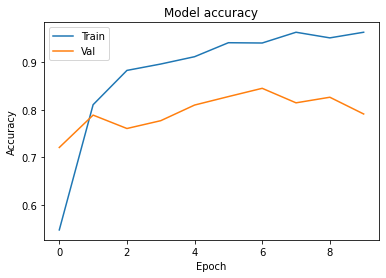

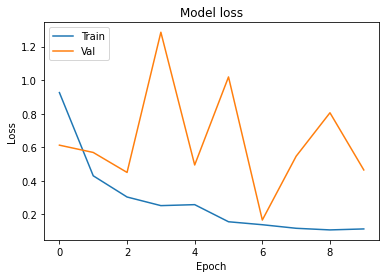

In [14]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()